## 0. Install and Import Dependencies

## 1. Extract Audio

In [3]:
from youtube_transcript_api import YouTubeTranscriptApi
import openai
from keys import *


In [4]:
youtube_video = "https://www.youtube.com/watch?v=A4OmtyaBHFE"
video_id = youtube_video.split("=")[1]

In [5]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [6]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

9081


In [7]:
# print(result)

In [8]:
print(type(result))

<class 'str'>


In [9]:
openai.api_key = OPENAI_API_KEY
def summarizer_ai(result):
    response = openai.Completion.create(
                        engine ="text-davinci-001",
                        prompt = result + "\nTl;dr",
                        temperature=0.7,
                        max_tokens=100,
                        top_p=1.0,
                        frequency_penalty=0.0,
                        presence_penalty=0.0
)
    return response

In [10]:
int(len(result)/4)

2270

In [11]:
num_iters = int(len(result)/1000)
summarized_text = ""
for i in range(0, num_iters + 1):
    start = 0
    start = i * 1000
    end = (i + 1) * 1000
    out = summarizer_ai(result[start:end])
    out = out['choices'][0]['text'].strip("\n\n")
    summarized_text += out

print(summarized_text)


The car industry has been a key part of the German economy for decades, and its future prospects are seen as a bellwether for the country's overall economic health. The industry is facing some major challenges in the coming years, including increasingly complex relationships with other countries and a shift to electric cars.Germany is a major player in the automotive industry, and the health of the industry is crucial to the country's economy. However, the industry is in decline, and German carmakers are playing catch-up to regain global market share. This could be a sign of trouble for the German economy as a whole. Germany's economic relationship with China has grown increasingly closer in the past 16 years, to the point where it is now overly reliant on the Chinese market. However, this reliance could be a risk in the current geopolitical climate, where there is competition between America and China.Germany's car industry needs to modernize before the pandemic, as it has traditional

In [12]:
print((summarized_text[:100]))

The car industry has been a key part of the German economy for decades, and its future prospects are


In [12]:
# When running this example in notebook, install DeepPhonemizer
!pip3 install deep_phonemizer

import torch
import torchaudio
import matplotlib
import matplotlib.pyplot as plt

import IPython

matplotlib.rcParams['figure.figsize'] = [16.0, 4.8]

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

print(torch.__version__)
print(torchaudio.__version__)
print(device)


You should consider upgrading via the '/Users/stefan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
1.10.0
0.10.0
cpu


In [13]:
symbols = '_-!\'(),.:;? abcdefghijklmnopqrstuvwxyz'
look_up = {s: i for i, s in enumerate(symbols)}
symbols = set(symbols)


def text_to_sequence(text):
    text = text.lower()
    return [look_up[s] for s in text if s in symbols]


text = "Hello world! Text to speech!"
print(text_to_sequence(summarized_text))


[18, 16, 29, 24, 12, 25, 36, 3, 30, 11, 14, 12, 29, 11, 20, 25, 15, 32, 30, 31, 29, 36, 11, 20, 30, 11, 12, 11, 33, 20, 31, 12, 23, 11, 27, 12, 29, 31, 11, 26, 17, 11, 20, 31, 30, 11, 16, 14, 26, 25, 26, 24, 36, 6, 11, 34, 20, 31, 19, 11, 23, 20, 25, 22, 30, 11, 31, 26, 11, 18, 26, 33, 16, 29, 25, 24, 16, 25, 31, 11, 31, 19, 12, 31, 11, 18, 26, 11, 13, 12, 14, 22, 11, 15, 16, 14, 12, 15, 16, 30, 7, 11, 19, 26, 34, 11, 31, 19, 20, 30, 11, 34, 26, 29, 23, 15, 1, 29, 16, 25, 26, 34, 25, 16, 15, 11, 24, 26, 31, 26, 29, 11, 20, 25, 15, 32, 30, 31, 29, 36, 11, 25, 12, 33, 20, 18, 12, 31, 16, 30, 11, 31, 19, 16, 11, 14, 19, 12, 23, 23, 16, 25, 18, 16, 30, 11, 12, 19, 16, 12, 15, 11, 14, 26, 32, 23, 15, 11, 31, 16, 23, 23, 11, 36, 26, 32, 11, 24, 26, 29, 16, 11, 31, 19, 12, 25, 11, 36, 26, 32, 11, 31, 19, 20, 25, 22, 11, 12, 13, 26, 32, 31, 11, 18, 16, 29, 24, 12, 25, 36, 3, 30, 11, 17, 32, 31, 32, 29, 16, 7, 8, 18, 16, 29, 24, 12, 25, 36, 3, 30, 11, 14, 12, 29, 11, 20, 25, 15, 32, 30, 31, 29,

In [14]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()

text = "Hello world! Text to speech!"
processed, lengths = processor(summarized_text)

print(processed)
print(lengths)


tensor([[18, 16, 29,  ..., 18, 16,  7]])
tensor([1991], dtype=torch.int32)


In [15]:
print([processor.tokens[i] for i in processed[0, :lengths[0]]])


['g', 'e', 'r', 'm', 'a', 'n', 'y', "'", 's', ' ', 'c', 'a', 'r', ' ', 'i', 'n', 'd', 'u', 's', 't', 'r', 'y', ' ', 'i', 's', ' ', 'a', ' ', 'v', 'i', 't', 'a', 'l', ' ', 'p', 'a', 'r', 't', ' ', 'o', 'f', ' ', 'i', 't', 's', ' ', 'e', 'c', 'o', 'n', 'o', 'm', 'y', ',', ' ', 'w', 'i', 't', 'h', ' ', 'l', 'i', 'n', 'k', 's', ' ', 't', 'o', ' ', 'g', 'o', 'v', 'e', 'r', 'n', 'm', 'e', 'n', 't', ' ', 't', 'h', 'a', 't', ' ', 'g', 'o', ' ', 'b', 'a', 'c', 'k', ' ', 'd', 'e', 'c', 'a', 'd', 'e', 's', '.', ' ', 'h', 'o', 'w', ' ', 't', 'h', 'i', 's', ' ', 'w', 'o', 'r', 'l', 'd', '-', 'r', 'e', 'n', 'o', 'w', 'n', 'e', 'd', ' ', 'm', 'o', 't', 'o', 'r', ' ', 'i', 'n', 'd', 'u', 's', 't', 'r', 'y', ' ', 'n', 'a', 'v', 'i', 'g', 'a', 't', 'e', 's', ' ', 't', 'h', 'e', ' ', 'c', 'h', 'a', 'l', 'l', 'e', 'n', 'g', 'e', 's', ' ', 'a', 'h', 'e', 'a', 'd', ' ', 'c', 'o', 'u', 'l', 'd', ' ', 't', 'e', 'l', 'l', ' ', 'y', 'o', 'u', ' ', 'm', 'o', 'r', 'e', ' ', 't', 'h', 'a', 'n', ' ', 'y', 'o', 'u',

In [16]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()

text = "Hello world! Text to speech!"
with torch.inference_mode():
  processed, lengths = processor(summarized_text)

print(processed)
print(lengths)


100%|██████████| 63.6M/63.6M [00:10<00:00, 6.12MB/s]


tensor([[63, 44, 66,  ..., 44, 63,  7]])
tensor([1751], dtype=torch.int32)


In [17]:
print([processor.tokens[i] for i in processed[0, :lengths[0]]])


['JH', 'ER', 'M', 'AH', 'N', 'IY', 'Z', ' ', 'K', 'AA', 'R', ' ', 'IH', 'N', 'D', 'AH', 'S', 'T', 'R', 'IY', ' ', 'IH', 'Z', ' ', 'AH', ' ', 'V', 'AY', 'T', 'AH', 'L', ' ', 'P', 'AA', 'R', 'T', ' ', 'AH', 'V', ' ', 'IH', 'T', 'S', ' ', 'IH', 'K', 'AA', 'N', 'AH', 'M', 'IY', ',', ' ', 'W', 'IH', 'DH', ' ', 'L', 'IH', 'NG', 'K', 'S', ' ', 'T', 'AH', ' ', 'G', 'AH', 'V', 'ER', 'N', 'M', 'AH', 'N', 'T', ' ', 'DH', 'AE', 'T', ' ', 'G', 'OW', ' ', 'B', 'AE', 'K', ' ', 'D', 'EH', 'K', 'EY', 'D', 'Z', '.', ' ', 'HH', 'AW', ' ', 'DH', 'IH', 'S', ' ', 'W', 'ER', 'L', 'D', '-', 'R', 'IH', 'N', 'AW', 'N', 'D', ' ', 'M', 'OW', 'T', 'ER', ' ', 'IH', 'N', 'D', 'AH', 'S', 'T', 'R', 'IY', ' ', 'N', 'AE', 'V', 'AH', 'G', 'EY', 'T', 'S', ' ', 'DH', 'AH', ' ', 'CH', 'AE', 'L', 'AH', 'N', 'JH', 'IH', 'Z', ' ', 'AH', 'HH', 'EH', 'D', ' ', 'K', 'UH', 'D', ' ', 'T', 'EH', 'L', ' ', 'Y', 'UW', ' ', 'M', 'AO', 'R', ' ', 'DH', 'AE', 'N', ' ', 'Y', 'UW', ' ', 'TH', 'IH', 'NG', 'K', ' ', 'AH', 'B', 'AW', 'T', ' ',

Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth" to /Users/stefan/.cache/torch/hub/checkpoints/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth
100%|██████████| 107M/107M [00:38<00:00, 2.95MB/s] 


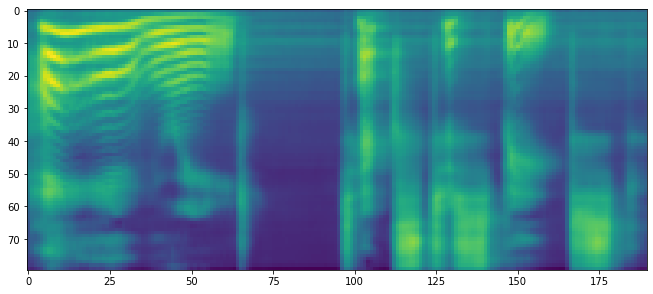

In [18]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)

text = "Hello world! Text to speech!"

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, _, _ = tacotron2.infer(processed, lengths)


plt.imshow(spec[0].cpu().detach())


torch.Size([80, 155])
torch.Size([80, 167])
torch.Size([80, 164])


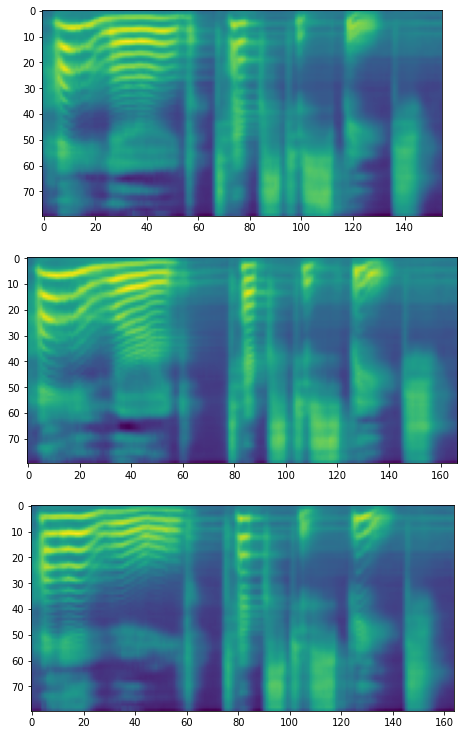

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(16, 4.3 * 3))
for i in range(3):
    with torch.inference_mode():
        spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    print(spec[0].shape)
    ax[i].imshow(spec[0].cpu().detach())
plt.show()


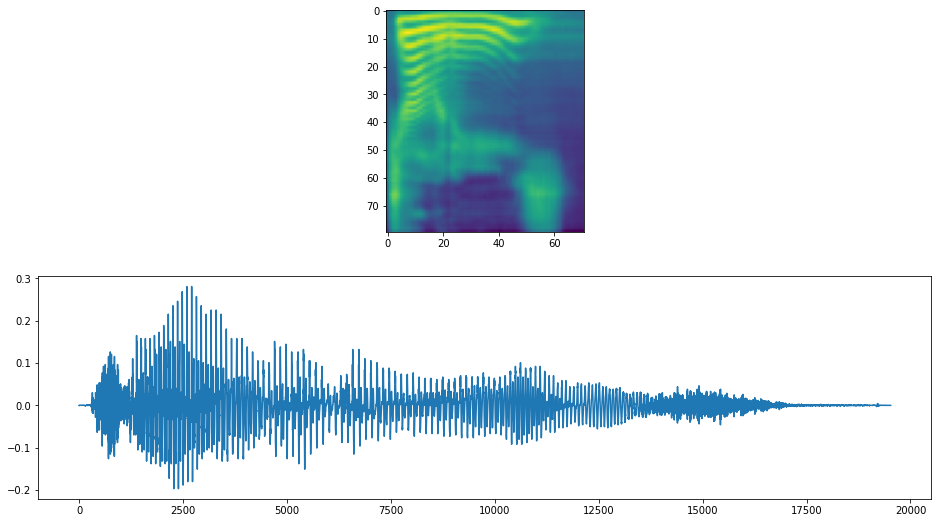

In [23]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = "Hello world! Text to speech!"

with torch.inference_mode():
    processed, lengths = processor(summarized_text[:10])
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach())
ax2.plot(waveforms[0].cpu().detach())

torchaudio.save("output_wavernn.wav", waveforms[0:1].cpu(), sample_rate=vocoder.sample_rate)
IPython.display.Audio("output_wavernn.wav")

In [22]:
"""Synthesizes speech from the input string of text or ssml.
Make sure to be working in a virtual environment.

Note: ssml must be well-formed according to:
    https://www.w3.org/TR/speech-synthesis/
"""
from google.cloud import texttospeech
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file(
    "keys_00.json")

# Instantiates a client
client = texttospeech.TextToSpeechClient(credentials=credentials)

# Set the text input to be synthesized
synthesis_input = texttospeech.SynthesisInput(text=summarized_text)

# Build the voice request, select the language code ("en-US") and the ssml
# voice gender ("neutral")
voice = texttospeech.VoiceSelectionParams(
    language_code="en-US", ssml_gender=texttospeech.SsmlVoiceGender.NEUTRAL
)

# Select the type of audio file you want returned
audio_config = texttospeech.AudioConfig(
    audio_encoding=texttospeech.AudioEncoding.MP3
)

# Perform the text-to-speech request on the text input with the selected
# voice parameters and audio file type
response = client.synthesize_speech(
    input=synthesis_input, voice=voice, audio_config=audio_config
)

# The response's audio_content is binary.
with open("output.mp3", "wb") as out:
    # Write the response to the output file.
    out.write(response.audio_content)
    print('Audio content written to file "output.mp3"')

#IPython.display.Audio("output.mp3")



Audio content written to file "output.mp3"


In [31]:
print(summarized_text)

Germany's car industry is a vital part of its economy, with links to government that go back decades. How this world-renowned motor industry navigates the challenges ahead could tell you more than you think about Germany's future.:

Germany's car industry is a crucial part of its economy, but it's losing ground to competitors. The future of the industry could be telling for the economy as a whole.Germany's reliance on China for trade has grown significantly in the past 16 years, but there is worry that this could leave them exposed to the ill winds of geopolitics and geoeconomics. Germany's new leader will have to recalibrate Germany's relationship with China on pretty much every front.Germany has been slow to digitize, but this is changing. The next government will need to be more digitally literate.Germany is facing some big challenges in the coming years, including digitalization and climate change. Its car industry is a microcosm for how the country will need to radically shift tra

In [32]:
response_2nd = openai.Completion.create(
    engine="text-davinci-001",
    prompt= "Decide whether a Tweet's sentiment is positive, neutral, or negative.\n\nTweet: \" " + summarized_text + " \"\n\nSentiment:",
    temperature=0.2,
    max_tokens=20,
    top_p=1.0,
    frequency_penalty=0.0,
    presence_penalty=0.0
)
response_2nd


<OpenAIObject text_completion id=cmpl-4guF5de9vbEerNXBA13jZ4Y8OahKV at 0x7f9226631bd0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": " Neutral"
    }
  ],
  "created": 1646131319,
  "id": "cmpl-4guF5de9vbEerNXBA13jZ4Y8OahKV",
  "model": "text-davinci:001",
  "object": "text_completion"
}

In [25]:
# Import packages2
import cv2

import numpy as np
img = cv2.imread('signs.png')

print(img.shape) # Print image shape
cv2.imshow("original", img)
# Cropping an image
cropped_image = img[210:-100,100:-100]
# # Display cropped image
cv2.imshow("cropped", cropped_image)
# # Save the cropped image
cv2.imwrite("img_sign.jpg", cropped_image)
print(cropped_image.shape)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


(3300, 2550, 3)
(3000, 2350, 3)


In [27]:
row = int(cropped_image.shape[0]/6)
col = int(cropped_image.shape[1]/5)
print(row, col)


500 470


In [28]:
for i in range(6):
    for l in range(5):
        cv2.imwrite("img_" + str(i*l) + ".jpg",
                    cropped_image[
                        (row*i):(row*(i+1)), (col*l):(col*(l+1))
                        ])